In [76]:
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt

# 0 Graph Basics

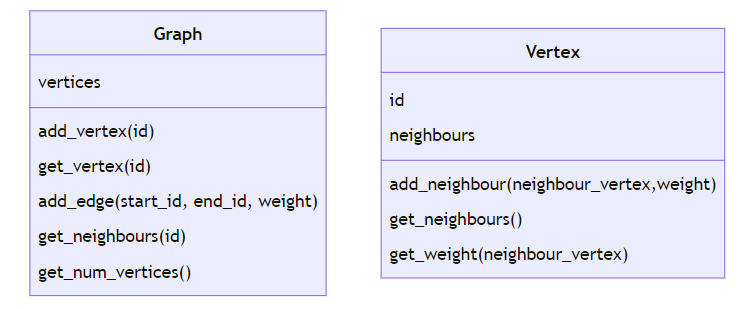

### Vertex 

The class `Vertex` has the following attributes:
- `id_`: to identify each vertex. This is of String data type.
- `neighbours`: which is a Dictionary where the keys are the neighbouring `Vertex` object instances that are connected to the current Vertex and the values are the weights of the edge between the current Vertex and the neighbouring vertices. 

The class has the following methods:
- `__init__(self, id_)`: which is used to initialized the attribute `id_`. By default, `id_` is set to an empty String . The attribute `neighbours` is always set to an empty dictionary.
- `add_neighbour(self, nbr_vertex, weight)`: which adds a neighbouring Vertex to the current Vertex. The second argument provides the weight of the edge between the current Vertex and the newly added neighbouring Vertex. By default, `weight` is `0`.
- `get_vertex_neigbours(self)`: which returns all the Vertices connected to the current Vertex as a list. The elements of the output list are of `Vertex` object instances.
- `get_weight(self, neighbour)`: which returns the weight of the requested neighbour. It should return `None` if the requested neighbour is not found.
- `__eq__(self, other)`: which returns true if the id of the current vertex object is the same as the `other` vertex's id. 
- `__lt__(self, other)`: which returns true if the id of the current vertex object is less than the `other` vertex's id.
- `__hash__(self)`: which calls the `hash()` function on `id_` and returns it. This allows the object to be a dictionary key. This is provided for you.
- `__str__(self)`: This method should return the id of the current vertex and a list of `id_`s of the neighbouring vertices, like `Vertex 2 is connected to: 3, 4, 5` .

In [10]:
class Vertex:
    def __init__(self, id_=""):
        self.id_ = id_
        self.neighbours = {}
    
    def add_neighbour(self, nbr_vertex, weight=0):
        self.neighbours[nbr_vertex] = weight
    
    def get_vertex_neighbours(self):
        return list(self.neighbours.keys())
    
    def get_weight(self, neighbour):
        if neighbour in self.neighbours.keys():
            return self.neighbours[neighbour]
        return None
    
    def __eq__(self, other):
        if self.id_ == other.id_: 
            return True
        return False

    def __lt__(self, other):
        if self.id_ < other.id_:
            return True
        return False

    def __hash__(self):
        return hash(self.id_)
    
    def __str__(self):
        my_string = f"Vertex {self.id_} is connected to: "
        my_neighbours = []
        for vertex in self.get_vertex_neighbours():
            my_neighbours.append(vertex.id_)
        my_string += ", ".join(my_neighbours)
        return my_string

In [11]:
v1 = Vertex("1")
v2 = Vertex("2")
v1.add_neighbour(v2, 3)
print(v1)

Vertex 1 is connected to: 2


In [12]:
v = Vertex()
v.add_neighbour(1)
v.add_neighbour(2)
v.add_neighbour(6)
v.get_vertex_neighbours()

v1 = Vertex("1")
assert v1.id_ == "1" and len(v1.neighbours) == 0
v2 = Vertex("2")
v1.add_neighbour(v2)
assert v1.get_vertex_neighbours()[0].id_ == "2" and v1.neighbours[v1.get_vertex_neighbours()[0]] == 0
v3 = Vertex("3")
v1.add_neighbour(v3, 3)
assert v1.get_weight(v3) == 3
v4 = Vertex("4")
assert v1.get_weight(v4) == None
assert v1 < v2
assert v1 != v2
assert str(v1) == "Vertex 1 is connected to: 2, 3"

### Graph

The class has the following attribute:
- `vertices`: which is a *dictionary* of Vertices. The keys are the `id`s of the Vertices and the values are `Vertex` object instances.

The class has the following property:
- `num_vertices`: which is a *computed* property that returns the number of vertices in the graph.

The class also has the following methods:
- `__init__(self)`: which initializes the graph with an empty dictionary.
- `_create_vertex(self, id_)`: which creates a new `Vertex` object with a given `id_`. This method is never called directly and is only used by `add_vertex(id_)`.
- `add_vertex(self, id_)`: which creates a new `Vertex` object, adding it into the dictionary `vertices`. The argument `id_` is a String. This method should call `_create_vertex(id_)`.
- `get_vertex(self, id_)`: which returns the `Vertex` object instance of the requested `id_`. The method should return `None` if the requested `id_` cannot be found. The argument `id_` is a String.
- `add_edge(start_v, end_v)`: which creates an edge from one Vertex to another Vertex. The arguments are the `id_`s of the two vertices and are both Strings.
- `get_neighbours(self, id_)`: which returns a list of `id_`s all the neighbouring vertices (of the specified Vertex `id_`). It should return `None` if `id_` cannot be found. The argument `id_` is a String and the elements of the output list are of `str` data type. 
- `__contains__(self, id_)`: which returns either `True` or `False` depending on whether the graph contains the specified Vertex's `id_`. The argument `id_` is a String.

In [13]:
class Graph:
    def __init__(self):
        self.vertices = {}
        
    def _create_vertex(self, id_):
        return Vertex(id_)

    def add_vertex(self, id_):
        self.vertices[id_] = self._create_vertex(id_)

    def get_vertex(self, id_):
        if id_ in self.vertices.keys():
            return self.vertices[id_]
        return None
        
    def add_edge(self, start_v, end_v, weight=0):
        if not start_v in self.vertices: 
            self.add_vertex(start_v)
        if not end_v in self.vertices: 
            self.add_vertex(end_v)
        v_start = self.vertices[start_v]
        v_end = self.vertices[end_v]
        v_start.add_neighbour(v_end)

    def get_neighbours(self, id_):
        vertex = self.get_vertex(id_)
        if vertex:
            return [neighbour.id_ for neighbour in vertex.get_vertex_neighbours()]
        return None
 
    def __contains__(self, id_):
        return (id_ in self.vertices)
    
    def __iter__(self):
        for k,v in self.vertices.items():
            yield v 

    @property        
    def num_vertices(self):
        return len(self.vertices)

# 1 Loading a Sample Dataset

### BOM & Routing

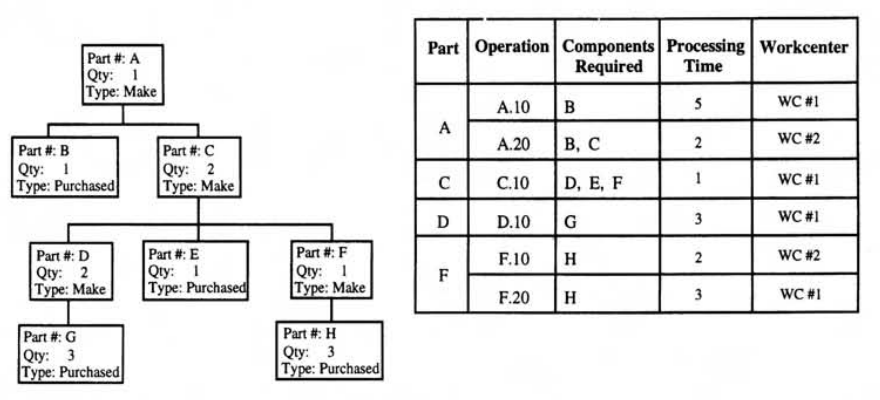

In [14]:
df = pd.DataFrame({
    "part": ['A', 'A', 'C', 'D', 'F', 'F'], 
    "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20'],
    'operation_id': [10, 20, 10, 10, 10, 20],
    "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H']],
    "processing_time": [5, 2, 1, 3, 2, 3],
    "workcenter": [1, 2, 1, 1, 2, 1]
})

display(df)

,part,operation,operation_id,components_required,processing_time,workcenter
0,A,A.10,10,[B],5,1
1,A,A.20,20,"[B, C]",2,2
2,C,C.10,10,"[D, E, F]",1,1
3,D,D.10,10,[G],3,1
4,F,F.10,10,[H],2,2
5,F,F.20,20,[H],3,1


# 2 Converting the BOM into an Operation Network

## 2.2 Using OOP + Optimizing the Algorithm

In [15]:
# df = pd.DataFrame({
#     "part": ['A', 'A', 'C', 'D', 'F', 'F', 'F'], 
#     "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20', 'F.30'],
#     'operation_id': [10, 20, 10, 10, 10, 20, 30],
#     "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H'], ['H']],
#     "processing_time": [5, 2, 1, 3, 2, 3, 4],
#     "workcenter": [1, 2, 1, 1, 2, 1, 3]
# })

df = pd.DataFrame({
    "part": ['A', 'A', 'C', 'D', 'F', 'F'], 
    "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20'],
    'operation_id': [10, 20, 10, 10, 10, 20],
    "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H']],
    "processing_time": [5, 2, 1, 3, 2, 3],
    "workcenter": [1, 2, 1, 1, 2, 1]
})

df['predecessor_operations'] = None
for i in range(len(df)): 
    predecessors = df.loc[i, 'components_required']
    predecessor_operations = []
    for predecessor in predecessors: 
        if predecessor in df['part'].unique():
            predecessor_operations += df['operation'].loc[(df['part']==predecessor)].tolist()
    df.at[i, 'predecessor_operations'] = predecessor_operations
    # TODO: fix the predecessor_operation appendage for part C. 
    # operation F.20 (more final) should be appended to C instead of operation F.10
    # the code is currently unable to differentiate between F.10 and F.20 and takes the first available item

# display(df)

for part in df['part'].unique(): 
    df_operations = df.loc[df['part'] == part]
    while(len(df_operations)) > 1: 
        max_operation_idx_1 = df_operations['operation_id'].idxmax()
        df_operations = df_operations.drop(index=max_operation_idx_1)
        max_operation_idx_2 = df_operations['operation_id'].idxmax()
        predecessor_operation = df.loc[max_operation_idx_2, 'operation']
        df.at[max_operation_idx_1,'predecessor_operations'].append(predecessor_operation)
display(df)

g = Graph()
for i in range(len(df)):
    end_vertex = df.loc[i, 'operation']
    for predecessor in df.loc[i,'predecessor_operations']: 
        start_vertex = predecessor
        # print(f"{type(start_vertex)}, {type(end_vertex)}")
        # print(f"({start_vertex}, {end_vertex})")
        g.add_edge(start_vertex, end_vertex)

for vertex in g:
    print(vertex)

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,A,A.10,10,[B],5,1,[]
1,A,A.20,20,"[B, C]",2,2,"[C.10, A.10]"
2,C,C.10,10,"[D, E, F]",1,1,"[D.10, F.10, F.20]"
3,D,D.10,10,[G],3,1,[]
4,F,F.10,10,[H],2,2,[]
5,F,F.20,20,[H],3,1,[F.10]


Vertex C.10 is connected to: A.20
Vertex A.20 is connected to: 
Vertex A.10 is connected to: A.20
Vertex D.10 is connected to: C.10
Vertex F.10 is connected to: C.10, F.20
Vertex F.20 is connected to: C.10


In [16]:
def process_df(df): 
    df['predecessor_operations'] = None
    for i in range(len(df)): 
        predecessors = df.loc[i, 'components_required']
        predecessor_operations = []
        for predecessor in predecessors: 
            if predecessor in df['part'].unique():
                predecessor_operations += df['operation'].loc[(df['part']==predecessor)].tolist()
        df.at[i, 'predecessor_operations'] = predecessor_operations
        # TODO: fix the predecessor_operation appendage for part C. 
        # operation F.20 (more final) should be appended to C instead of operation F.10
        # the code is currently unable to differentiate between F.10 and F.20 and takes the first available item

    # display(df)

    for part in df['part'].unique(): 
        df_operations = df.loc[df['part'] == part]
        while(len(df_operations)) > 1: 
            max_operation_idx_1 = df_operations['operation_id'].idxmax()
            df_operations = df_operations.drop(index=max_operation_idx_1)
            max_operation_idx_2 = df_operations['operation_id'].idxmax()
            predecessor_operation = df.loc[max_operation_idx_2, 'operation']
            df.at[max_operation_idx_1,'predecessor_operations'].append(predecessor_operation)
    return df

## 2.3 Test Cases

In [17]:
df = None
dict_df = {}
filepath = 'agrawal_test_set.xlsx'
excel_file = pd.ExcelFile(filepath)

for sheet_name in excel_file.sheet_names:
    dict_df[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

for df_key in dict_df: 
    # display(dict_df[df_key])
    df = process_df(dict_df[df_key])
    # print(dict_df[df_key])
    display(dict_df[df_key].head())
    g = Graph()
    for i in range(len(df)):
        end_vertex = df.loc[i, 'operation']
        for predecessor in df.loc[i,'predecessor_operations']: 
            start_vertex = predecessor
            g.add_edge(start_vertex, end_vertex)

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A, K]",2,WC#1,[]
1,C,C.10,10,"[B,D,K]",1,WC#1,[B.10]
2,E,E.10,10,"[C,L]",1,WC#2,"[C.10, L.10]"
3,F,F.10,10,"[C,G]",3,WC#2,[C.10]
4,H,H.10,10,"[E,F]",7,WC#3,"[E.10, F.10]"


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,P]",2,WC#1,[]
1,C,C.10,10,[A],2,WC#4,[]
2,NaN,C.20,20,[A],6,WC#2,[]
3,D,D.10,10,[A],7,WC#3,[]
4,E,E.10,10,"[A,Q]",4,WC#1,[]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,Z]",5,WC#1,[]
1,C,C.10,10,[B],20,WC#2,[B.10]
2,E,E.10,10,"[C,D,F]",19,WC#3,"[C.10, F.10]"
3,F,F.10,10,[B],6,WC#3,[B.10]
4,G,G.10,10,"[E,AA]",15,WC#4,[E.10]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,P1,P1.10,10,"[A, B, C, D]",45,WC#1,[]
1,P2,P2.10,10,"[P1, E]",30,WC#2,[]
2,P3,P3.10,10,"[P2, F, G]",25,WC#3,[]
3,P4,P4.10,10,"[P3, H, I, J]",40,WC#1,[]
4,P5,P5.10,10,"[P4, K, L]",55,WC#2,[]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,Lasagna,Lasagna.10,10,"[Tomato Sauce, Cheese, Noodles, Ground Beef, B...",45,WC#4,[]
1,Tomato Sauce,Tomato Sauce.10,10,"[Tomatoes, Olive Oil, Garlic]",20,WC#1,[]
2,Cheese,Cheese.10,10,"[Milk, Rennet]",30,WC#2,[]
3,Noodles,Noodles.10,10,"[Flour, Eggs, Salt]",25,WC#3,[]
4,Ground Beef,Ground Beef.10,10,"[Beef, Seasoning]",15,WC#2,[]


# 3. EDD

### 1st Try

Schedules for Sheet1:
Machine WC#1:
  Job B.10 from 0 to 2
  Job C.10 from 2 to 3
  Job E.10 from 3 to 4
  Job F.10 from 4 to 7
  Job H.10 from 7 to 14
  Job I.10 from 14 to 18
  Job J.10 from 18 to 36
  Job L.10 from 36 to 39
  Job M.10 from 39 to 44
  Job N.10 from 44 to 54
  Job O.10 from 54 to 58
  Job P.10 from 58 to 59
  Job Q.10 from 59 to 67
  Job R.10 from 67 to 74
  Job T.10 from 74 to 75
  Job U.10 from 75 to 83
Machine WC#2:
Machine WC#3:


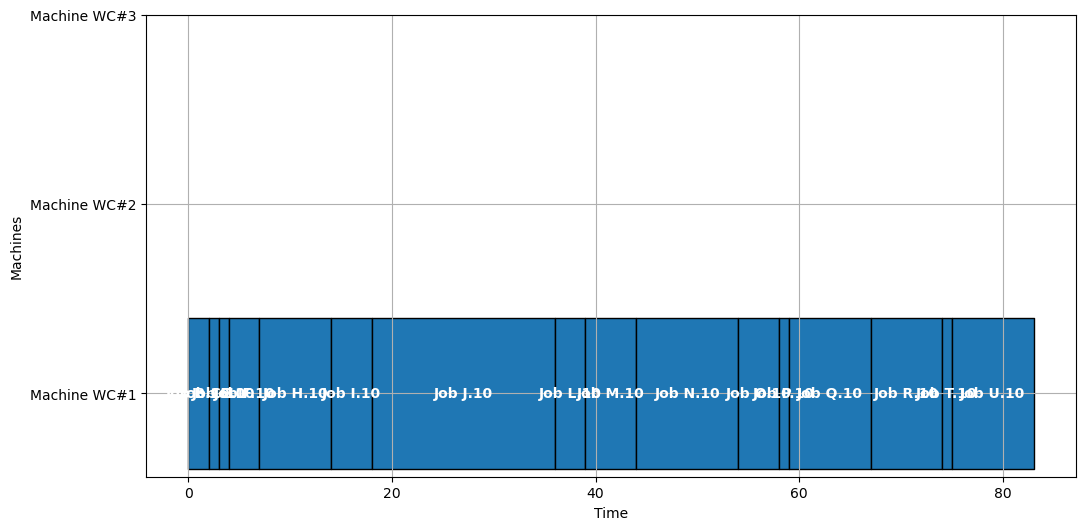

Schedules for Sheet2:
Machine WC#1:
  Job B.10 from 0 to 2
  Job C.10 from 2 to 4
  Job C.20 from 4 to 10
  Job D.10 from 10 to 17
  Job E.10 from 17 to 21
  Job F.10 from 21 to 24
  Job G.10 from 24 to 42
  Job H.10 from 42 to 44
  Job I.10 from 44 to 48
  Job J.10 from 48 to 50
  Job K.10 from 50 to 152
  Job L.10 from 152 to 153
  Job L.20 from 153 to 156
  Job N.10 from 156 to 158
  Job O.10 from 158 to 162
Machine WC#4:
Machine WC#2:
Machine WC#3:


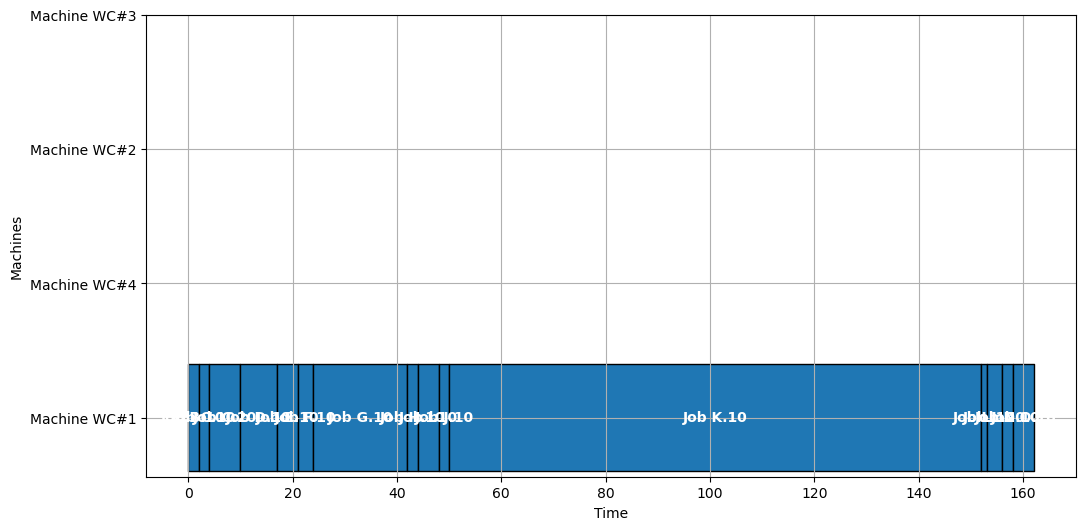

Schedules for Sheet3:
Machine WC#1:
  Job B.10 from 0 to 5
  Job C.10 from 5 to 25
  Job E.10 from 25 to 44
  Job F.10 from 44 to 50
  Job G.10 from 50 to 65
  Job H.10 from 65 to 80
  Job I.10 from 80 to 106
  Job J.10 from 106 to 106
  Job K.10 from 106 to 126
  Job L.10 from 126 to 146
  Job M.10 from 146 to 248
  Job O.10 from 248 to 257
  Job Q.10 from 257 to 281
  Job S.10 from 281 to 289
  Job T.10 from 289 to 487
  Job V.10 from 487 to 506
  Job W.10 from 506 to 520
  Job Y.10 from 520 to 536
Machine WC#2:
Machine WC#3:
Machine WC#4:


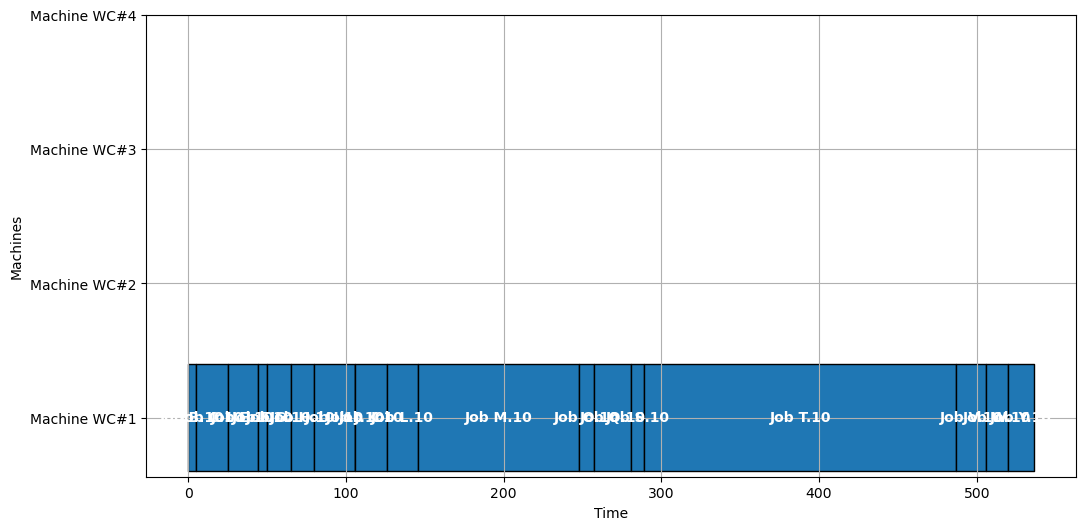

Schedules for Sheet4:
Machine WC#1:
  Job P1.10 from 0 to 45
  Job P2.10 from 45 to 75
  Job P3.10 from 75 to 100
  Job P4.10 from 100 to 140
  Job P5.10 from 140 to 195
  Job P6.10 from 195 to 230
  Job P7.10 from 230 to 250
  Job P8.10 from 250 to 265
  Job P9.10 from 265 to 315
  Job P10.10 from 315 to 375
  Job P11.10 from 375 to 420
  Job P12.10 from 420 to 455
  Job P13.10 from 455 to 475
  Job P14.10 from 475 to 500
  Job P15.10 from 500 to 540
  Job P16.10 from 540 to 595
  Job P17.10 from 595 to 630
  Job P18.10 from 630 to 650
  Job P19.10 from 650 to 665
  Job P20.10 from 665 to 715
  Job P21.10 from 715 to 775
  Job P22.10 from 775 to 820
  Job P23.10 from 820 to 855
  Job P24.10 from 855 to 875
  Job P25.10 from 875 to 900
  Job P26.10 from 900 to 940
  Job P27.10 from 940 to 995
  Job P28.10 from 995 to 1030
  Job P29.10 from 1030 to 1050
  Job P30.10 from 1050 to 1065
Machine WC#2:
Machine WC#3:
Machine WC#4:


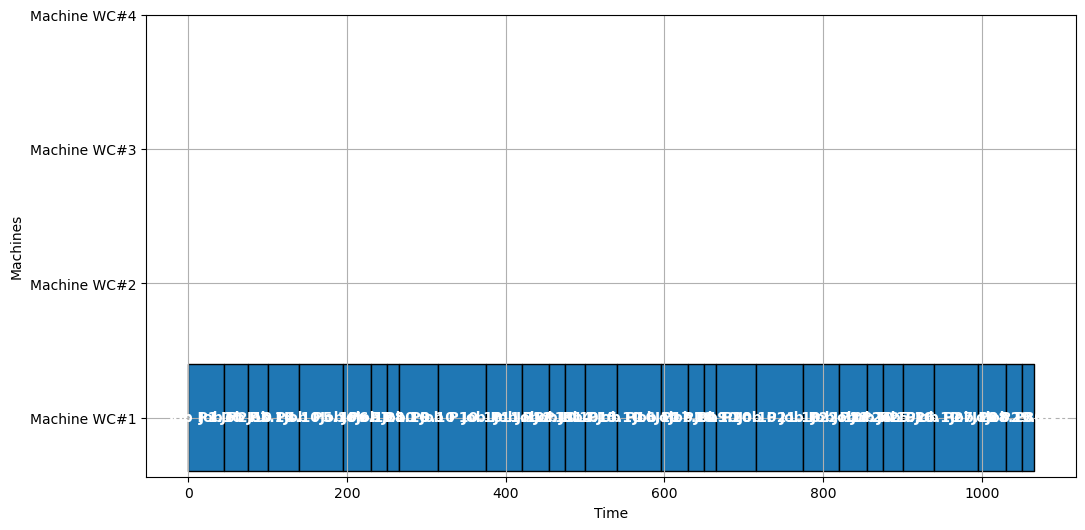

Schedules for Sheet5:
Machine WC#4:
  Job Lasagna.10 from 0 to 45
  Job Tomato Sauce.10 from 45 to 65
  Job Cheese.10 from 65 to 95
  Job Noodles.10 from 95 to 120
  Job Ground Beef.10 from 120 to 135
  Job Bechamel Sauce.10 from 135 to 170
  Job Tomatoes.10 from 170 to 180
  Job Olive Oil.10 from 180 to 195
  Job Garlic.10 from 195 to 205
  Job Milk.10 from 205 to 220
  Job Rennet.10 from 220 to 230
  Job Flour.10 from 230 to 240
  Job Eggs.10 from 240 to 250
  Job Salt.10 from 250 to 260
  Job Beef.10 from 260 to 280
  Job Seasoning.10 from 280 to 290
  Job Butter.10 from 290 to 305
  Job Nutmeg.10 from 305 to 315
  Job Olives.10 from 315 to 335
  Job Cream.10 from 335 to 355
Machine WC#1:
Machine WC#2:
Machine WC#3:


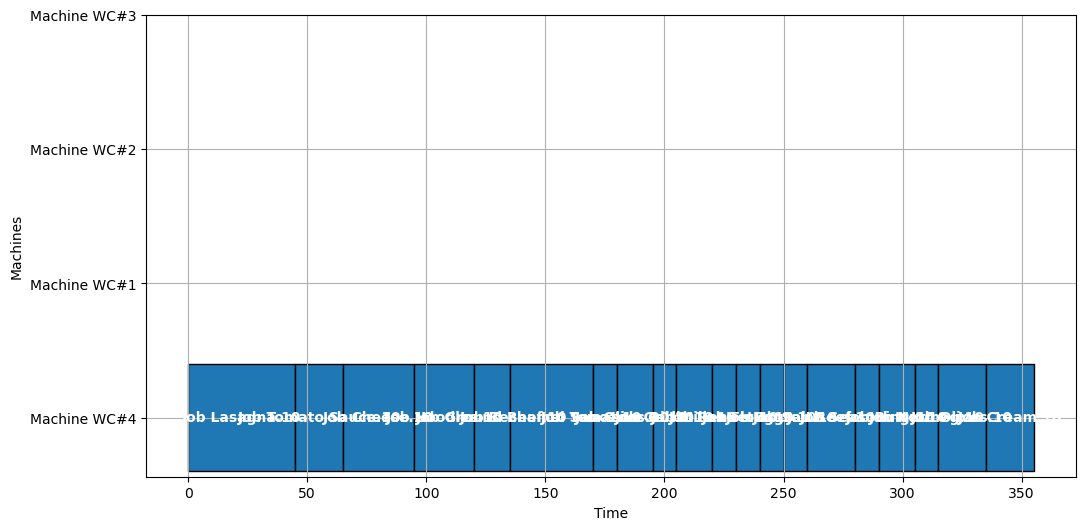

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the required columns are present in the DataFrame
required_columns = ['operation', 'processing_time', 'workcenter', 'predecessor_operations', 'due_date']

# Process the DataFrame to handle predecessor operations correctly
def process_df(df):
    if 'predecessor_operations' in df.columns:
        df['predecessor_operations'] = df['predecessor_operations'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
    else:
        df['predecessor_operations'] = [[] for _ in range(len(df))]
    return df

# Define the Graph class to handle dependencies
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, start_vertex, end_vertex):
        if start_vertex in self.graph:
            self.graph[start_vertex].append(end_vertex)
        else:
            self.graph[start_vertex] = [end_vertex]

    def get_predecessors(self, vertex):
        return [v for v, successors in self.graph.items() if vertex in successors]

# Function to check if a job can be scheduled
def can_be_scheduled(job_id, completed_jobs, graph):
    predecessors = graph.get_predecessors(job_id)
    for pred in predecessors:
        if pred not in completed_jobs:
            return False
    return True

# Function to schedule jobs
def schedule_jobs(df, graph):
    # Extract unique jobs and machines
    jobs = df['operation'].unique()
    machines = df['workcenter'].unique()
    
    # Initialize dictionaries to store schedules and completion times
    schedules = {machine: [] for machine in machines}
    completion_times = {machine: 0 for machine in machines}
    
    # Extract job processing times and due dates
    processing_times = df.set_index('operation')['processing_time'].to_dict()
    due_dates = df.set_index('operation')['due_date'].to_dict()
    
    # Initialize set for completed jobs
    completed_jobs = set()
    
    # Sort jobs by due date
    jobs_sorted_by_due_date = sorted(jobs, key=lambda x: due_dates.get(x, float('inf')))
    
    # Schedule jobs
    for job in jobs_sorted_by_due_date:
        # Find a machine to schedule the job
        for machine in machines:
            if can_be_scheduled(job, completed_jobs, graph):
                start_time = completion_times[machine]
                end_time = start_time + processing_times[job]
                schedules[machine].append((job, start_time, end_time))
                completion_times[machine] = end_time
                completed_jobs.add(job)
                break
    
    return schedules

# Plotting function for the Gantt chart
def plot_gantt_chart(schedules):
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = plt.cm.get_cmap('tab20', len(schedules))
    
    machine_idx = 0
    for machine, jobs in schedules.items():
        for job, start_time, end_time in jobs:
            ax.broken_barh([(start_time, end_time - start_time)], (machine_idx - 0.4, 0.8),
                           facecolors=(colors(machine_idx)), edgecolor='black')
            ax.text((start_time + end_time) / 2, machine_idx, f"Job {job}", 
                    ha='center', va='center', color='white', weight='bold')
        machine_idx += 1

    ax.set_yticks(range(len(schedules)))
    ax.set_yticklabels([f"Machine {m}" for m in schedules.keys()])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.grid(True)
    plt.show()

# Load the Excel file and process each sheet
dict_df = {}
filepath = 'agrawal_test_set.xlsx'
excel_file = pd.ExcelFile(filepath)

for sheet_name in excel_file.sheet_names:
    dict_df[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

# Schedule the jobs for each sheet in the Excel file
for df_key in dict_df:
    df = dict_df[df_key]
    
    # Ensure all required columns are present
    for col in required_columns:
        if col not in df.columns:
            if col == 'predecessor_operations':
                df[col] = [[] for _ in range(len(df))]
            elif col == 'due_date':
                df[col] = [float('inf') for _ in range(len(df))]
            else:
                raise KeyError(f"Column '{col}' not found in the DataFrame '{df_key}'")
    
    df = process_df(df)
    
    g = Graph()
    for i in range(len(df)):
        end_vertex = df.loc[i, 'operation']
        for predecessor in df.loc[i, 'predecessor_operations']:
            start_vertex = predecessor
            g.add_edge(start_vertex, end_vertex)
    
    schedules = schedule_jobs(df, g)
    
    print(f"Schedules for {df_key}:")
    for machine, jobs in schedules.items():
        print(f"Machine {machine}:")
        for job, start_time, end_time in jobs:
            print(f"  Job {job} from {start_time} to {end_time}")

    plot_gantt_chart(schedules)



### 2nd Try

Schedules for Sheet1:
Machine WC#1:
  Job B.10 from 0 to 2
  Job C.10 from 2 to 3
  Job J.10 from 3 to 21
  Job Q.10 from 21 to 29
  Job R.10 from 29 to 36
  Job U.10 from 36 to 44
Machine WC#2:
  Job E.10 from 0 to 1
  Job F.10 from 1 to 4
  Job I.10 from 4 to 8
  Job M.10 from 8 to 13
  Job N.10 from 13 to 23
  Job P.10 from 23 to 24
Machine WC#3:
  Job H.10 from 0 to 7
  Job L.10 from 7 to 10
  Job O.10 from 10 to 14
  Job T.10 from 14 to 15


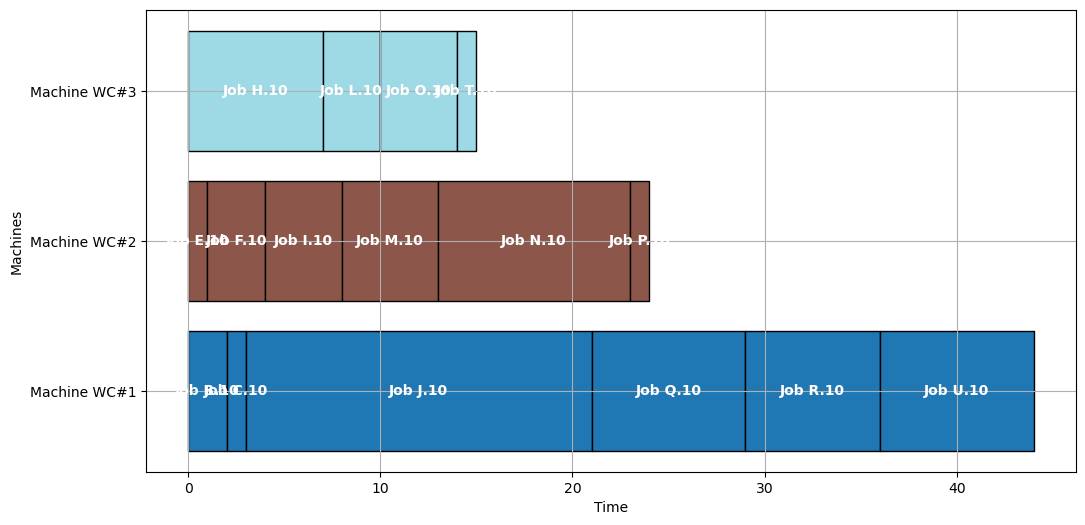

Schedules for Sheet2:
Machine WC#1:
  Job B.10 from 0 to 2
  Job E.10 from 2 to 6
  Job G.10 from 6 to 24
  Job L.20 from 24 to 27
Machine WC#4:
  Job C.10 from 0 to 2
  Job F.10 from 2 to 5
  Job K.10 from 5 to 107
  Job O.10 from 107 to 111
Machine WC#2:
  Job C.20 from 0 to 6
  Job I.10 from 6 to 10
  Job J.10 from 10 to 12
Machine WC#3:
  Job D.10 from 0 to 7
  Job H.10 from 7 to 9
  Job L.10 from 9 to 10
  Job N.10 from 10 to 12


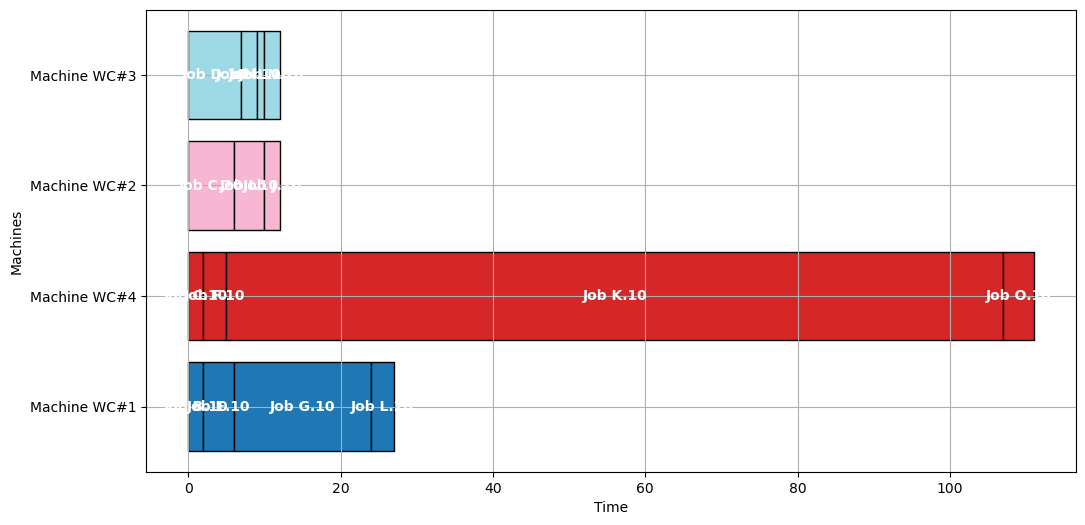

Schedules for Sheet3:
Machine WC#1:
  Job B.10 from 0 to 5
  Job H.10 from 5 to 20
  Job K.10 from 20 to 40
  Job M.10 from 40 to 142
  Job Q.10 from 142 to 166
  Job W.10 from 166 to 180
Machine WC#2:
  Job C.10 from 0 to 20
  Job J.10 from 20 to 20
  Job O.10 from 20 to 29
  Job T.10 from 29 to 227
  Job Y.10 from 227 to 243
Machine WC#3:
  Job E.10 from 0 to 19
  Job F.10 from 19 to 25
  Job I.10 from 25 to 51
  Job L.10 from 51 to 71
  Job S.10 from 71 to 79
  Job V.10 from 79 to 98
Machine WC#4:
  Job G.10 from 0 to 15


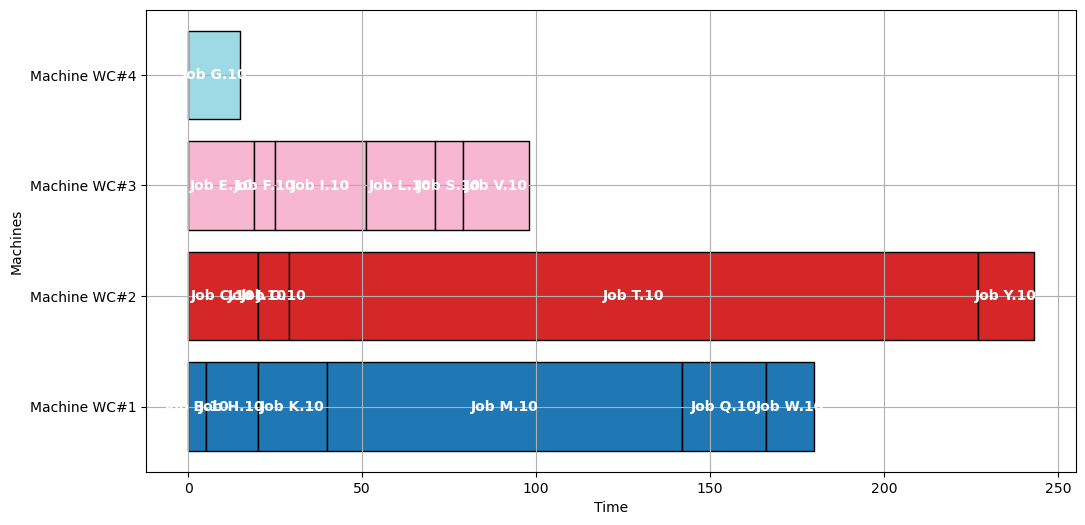

Schedules for Sheet4:
Machine WC#1:
  Job P1.10 from 0 to 45
  Job P4.10 from 45 to 85
  Job P8.10 from 85 to 100
  Job P12.10 from 100 to 135
  Job P15.10 from 135 to 175
  Job P19.10 from 175 to 190
  Job P23.10 from 190 to 225
  Job P26.10 from 225 to 265
  Job P30.10 from 265 to 280
Machine WC#2:
  Job P2.10 from 0 to 30
  Job P5.10 from 30 to 85
  Job P9.10 from 85 to 135
  Job P13.10 from 135 to 155
  Job P16.10 from 155 to 210
  Job P20.10 from 210 to 260
  Job P24.10 from 260 to 280
  Job P27.10 from 280 to 335
Machine WC#3:
  Job P3.10 from 0 to 25
  Job P6.10 from 25 to 60
  Job P10.10 from 60 to 120
  Job P14.10 from 120 to 145
  Job P17.10 from 145 to 180
  Job P21.10 from 180 to 240
  Job P25.10 from 240 to 265
  Job P28.10 from 265 to 300
Machine WC#4:
  Job P7.10 from 0 to 20
  Job P11.10 from 20 to 65
  Job P18.10 from 65 to 85
  Job P22.10 from 85 to 130
  Job P29.10 from 130 to 150


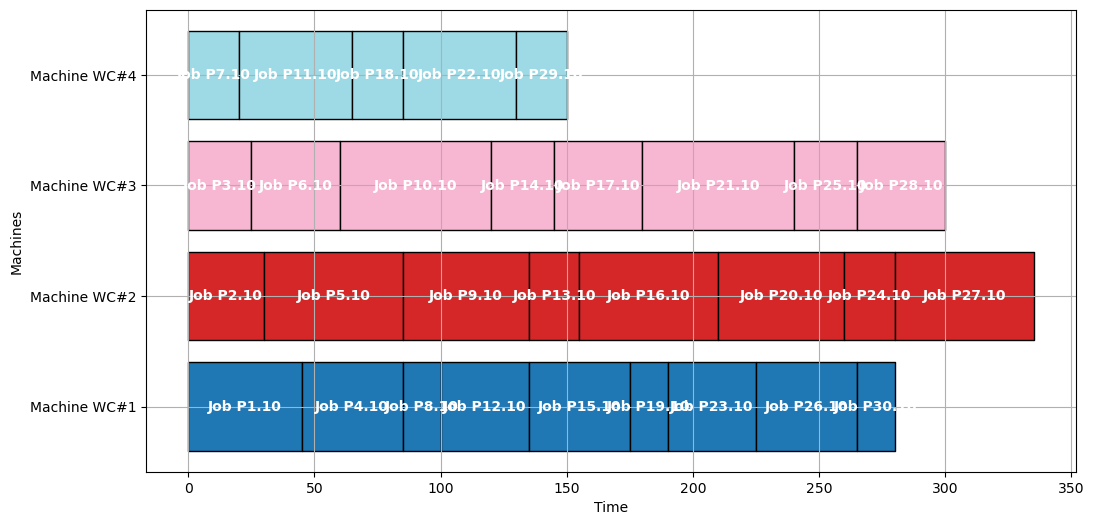

Schedules for Sheet5:
Machine WC#4:
  Job Lasagna.10 from 0 to 45
Machine WC#1:
  Job Tomato Sauce.10 from 0 to 20
  Job Bechamel Sauce.10 from 20 to 55
  Job Tomatoes.10 from 55 to 65
  Job Garlic.10 from 65 to 75
  Job Butter.10 from 75 to 90
  Job Nutmeg.10 from 90 to 100
  Job Cream.10 from 100 to 120
Machine WC#2:
  Job Cheese.10 from 0 to 30
  Job Ground Beef.10 from 30 to 45
  Job Milk.10 from 45 to 60
  Job Rennet.10 from 60 to 70
  Job Beef.10 from 70 to 90
  Job Seasoning.10 from 90 to 100
Machine WC#3:
  Job Noodles.10 from 0 to 25
  Job Olive Oil.10 from 25 to 40
  Job Flour.10 from 40 to 50
  Job Eggs.10 from 50 to 60
  Job Salt.10 from 60 to 70
  Job Olives.10 from 70 to 90


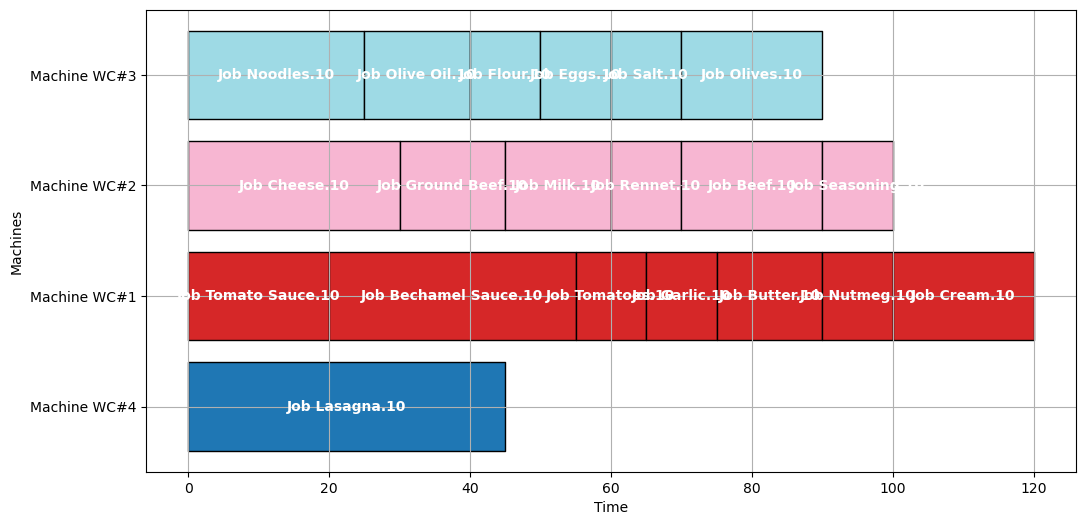

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the required columns are present in the DataFrame
required_columns = ['operation', 'processing_time', 'workcenter', 'predecessor_operations', 'due_date', 'components_required']

# Process the DataFrame to handle predecessor operations correctly
def process_df(df):
    if 'predecessor_operations' in df.columns:
        df['predecessor_operations'] = df['predecessor_operations'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
    else:
        df['predecessor_operations'] = [[] for _ in range(len(df))]
    return df

# Define the Graph class to handle dependencies
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, start_vertex, end_vertex):
        if start_vertex in self.graph:
            self.graph[start_vertex].append(end_vertex)
        else:
            self.graph[start_vertex] = [end_vertex]

    def get_predecessors(self, vertex):
        return [v for v, successors in self.graph.items() if vertex in successors]

# Function to check if a job can be scheduled
def can_be_scheduled(job_id, completed_jobs, graph):
    predecessors = graph.get_predecessors(job_id)
    for pred in predecessors:
        if pred not in completed_jobs:
            return False
    return True

# Function to schedule jobs
def schedule_jobs(df, graph):
    # Extract unique jobs and machines
    jobs = df['operation'].unique()
    machines = df['workcenter'].unique()
    
    # Initialize dictionaries to store schedules and completion times
    schedules = {machine: [] for machine in machines}
    completion_times = {machine: 0 for machine in machines}
    job_completion_times = {}
    
    # Extract job processing times and due dates
    processing_times = df.set_index('operation')['processing_time'].to_dict()
    due_dates = df.set_index('operation')['due_date'].to_dict()
    workcenters = df.set_index('operation')['workcenter'].to_dict()
    
    # Initialize set for completed jobs
    completed_jobs = set()
    
    # Sort jobs by due date
    jobs_sorted_by_due_date = sorted(jobs, key=lambda x: due_dates.get(x, float('inf')))
    
    # Schedule jobs
    for job in jobs_sorted_by_due_date:
        if can_be_scheduled(job, completed_jobs, graph):
            machine = workcenters[job]
            # Find the earliest start time after all predecessors are completed
            start_time = max([job_completion_times.get(pred, 0) for pred in graph.get_predecessors(job)] + [completion_times[machine]])
            end_time = start_time + processing_times[job]
            schedules[machine].append((job, start_time, end_time))
            completion_times[machine] = end_time
            job_completion_times[job] = end_time
            completed_jobs.add(job)
    
    return schedules

# Plotting function for the Gantt chart
def plot_gantt_chart(schedules):
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = plt.cm.get_cmap('tab20', len(schedules))
    
    machine_idx = 0
    for machine, jobs in schedules.items():
        for job, start_time, end_time in jobs:
            ax.broken_barh([(start_time, end_time - start_time)], (machine_idx - 0.4, 0.8),
                           facecolors=(colors(machine_idx)), edgecolor='black')
            ax.text((start_time + end_time) / 2, machine_idx, f"Job {job}", 
                    ha='center', va='center', color='white', weight='bold')
        machine_idx += 1

    ax.set_yticks(range(len(schedules)))
    ax.set_yticklabels([f"Machine {m}" for m in schedules.keys()])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.grid(True)
    plt.show()

# Load the Excel file and process each sheet
dict_df = {}
filepath = 'agrawal_test_set.xlsx'
excel_file = pd.ExcelFile(filepath)

for sheet_name in excel_file.sheet_names:
    dict_df[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

# Schedule the jobs for each sheet in the Excel file
for df_key in dict_df:
    df = dict_df[df_key]
    
    # Ensure all required columns are present
    for col in required_columns:
        if col not in df.columns:
            if col == 'predecessor_operations':
                df[col] = [[] for _ in range(len(df))]
            elif col == 'due_date':
                df[col] = [float('inf') for _ in range(len(df))]
            elif col == 'components_required':
                df[col] = [[] for _ in range(len(df))]
            else:
                raise KeyError(f"Column '{col}' not found in the DataFrame '{df_key}'")
    
    df = process_df(df)
    
    g = Graph()
    for i in range(len(df)):
        end_vertex = df.loc[i, 'operation']
        for predecessor in df.loc[i, 'predecessor_operations']:
            start_vertex = predecessor
            g.add_edge(start_vertex, end_vertex)
    
    schedules = schedule_jobs(df, g)
    
    print(f"Schedules for {df_key}:")
    for machine, jobs in schedules.items():
        print(f"Machine {machine}:")
        for job, start_time, end_time in jobs:
            print(f"  Job {job} from {start_time} to {end_time}")

    plot_gantt_chart(schedules)


### 3rd Try

Schedules for Sheet1:
Machine WC#1:
  Job B.10 from 0 to 2
  Job C.10 from 0 to 1
  Job J.10 from 0 to 18
  Job Q.10 from 0 to 8
  Job R.10 from 0 to 7
  Job U.10 from 0 to 8
Machine WC#2:
  Job E.10 from 0 to 1
  Job F.10 from 0 to 3
  Job I.10 from 0 to 4
  Job M.10 from 0 to 5
  Job N.10 from 0 to 10
  Job P.10 from 0 to 1
Machine WC#3:
  Job H.10 from 0 to 7
  Job L.10 from 0 to 3
  Job O.10 from 0 to 4
  Job T.10 from 0 to 1


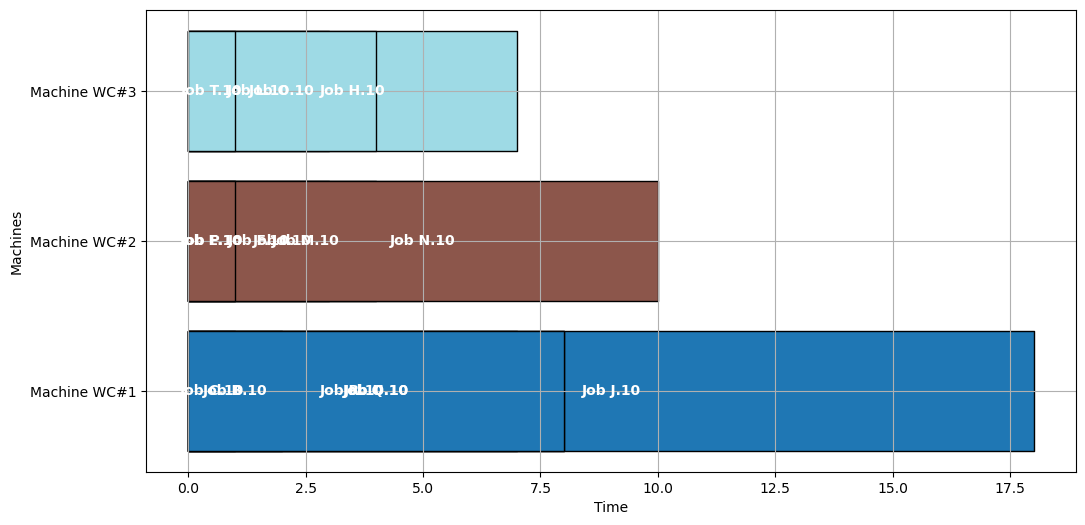

Schedules for Sheet2:
Machine WC#1:
  Job B.10 from 0 to 2
  Job E.10 from 0 to 4
  Job G.10 from 0 to 18
  Job L.20 from 0 to 3
Machine WC#4:
  Job C.10 from 0 to 2
  Job F.10 from 0 to 3
  Job K.10 from 0 to 102
  Job O.10 from 0 to 4
Machine WC#2:
  Job C.20 from 0 to 6
  Job I.10 from 0 to 4
  Job J.10 from 0 to 2
Machine WC#3:
  Job D.10 from 0 to 7
  Job H.10 from 0 to 2
  Job L.10 from 0 to 1
  Job N.10 from 0 to 2


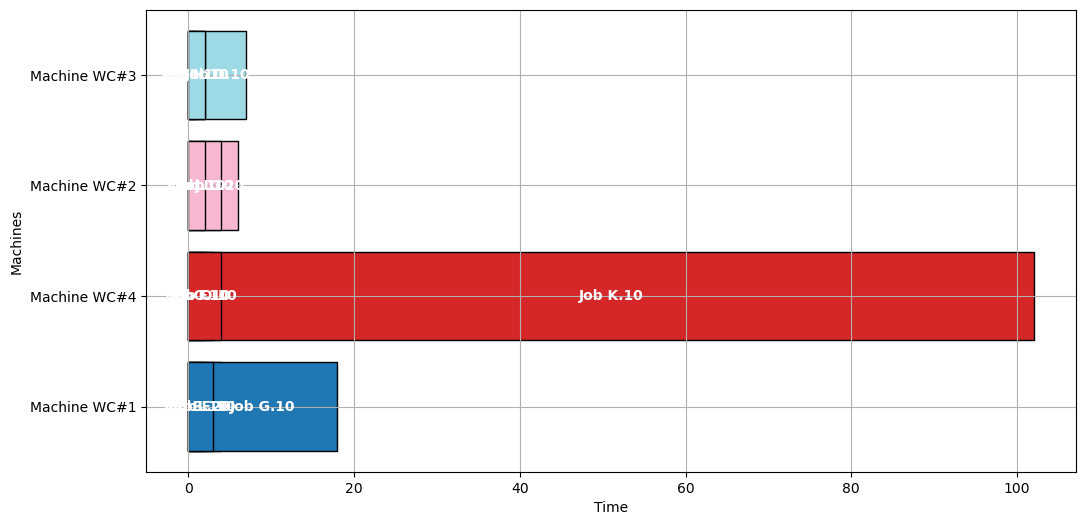

Schedules for Sheet3:
Machine WC#1:
  Job B.10 from 0 to 5
  Job H.10 from 0 to 15
  Job K.10 from 0 to 20
  Job M.10 from 0 to 102
  Job Q.10 from 0 to 24
  Job W.10 from 0 to 14
Machine WC#2:
  Job C.10 from 0 to 20
  Job J.10 from 0 to 0
  Job O.10 from 0 to 9
  Job T.10 from 0 to 198
  Job Y.10 from 0 to 16
Machine WC#3:
  Job E.10 from 0 to 19
  Job F.10 from 0 to 6
  Job I.10 from 0 to 26
  Job L.10 from 0 to 20
  Job S.10 from 0 to 8
  Job V.10 from 0 to 19
Machine WC#4:
  Job G.10 from 0 to 15


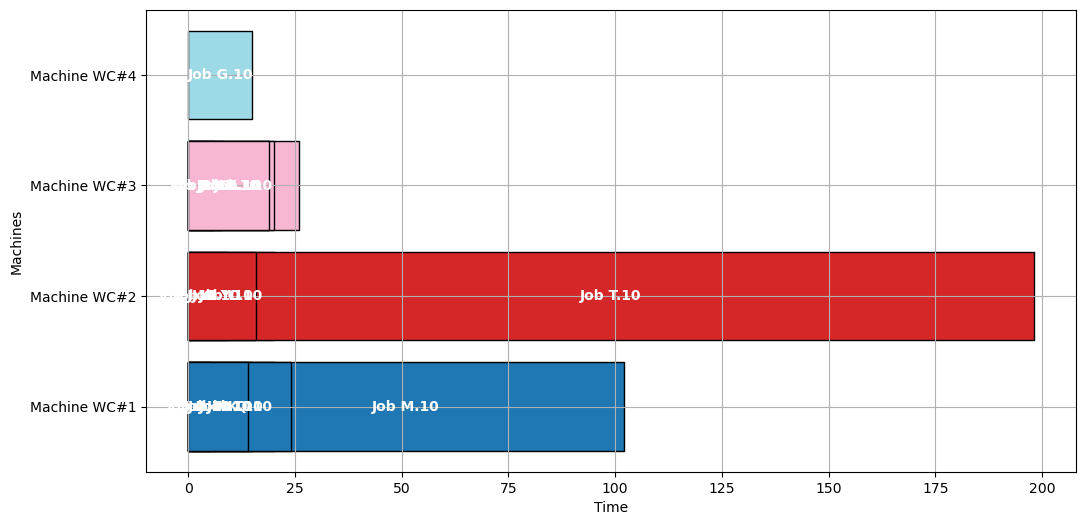

Schedules for Sheet4:
Machine WC#1:
  Job P1.10 from 0 to 45
  Job P4.10 from 0 to 40
  Job P8.10 from 0 to 15
  Job P12.10 from 0 to 35
  Job P15.10 from 0 to 40
  Job P19.10 from 0 to 15
  Job P23.10 from 0 to 35
  Job P26.10 from 0 to 40
  Job P30.10 from 0 to 15
Machine WC#2:
  Job P2.10 from 0 to 30
  Job P5.10 from 0 to 55
  Job P9.10 from 0 to 50
  Job P13.10 from 0 to 20
  Job P16.10 from 0 to 55
  Job P20.10 from 0 to 50
  Job P24.10 from 0 to 20
  Job P27.10 from 0 to 55
Machine WC#3:
  Job P3.10 from 0 to 25
  Job P6.10 from 0 to 35
  Job P10.10 from 0 to 60
  Job P14.10 from 0 to 25
  Job P17.10 from 0 to 35
  Job P21.10 from 0 to 60
  Job P25.10 from 0 to 25
  Job P28.10 from 0 to 35
Machine WC#4:
  Job P7.10 from 0 to 20
  Job P11.10 from 0 to 45
  Job P18.10 from 0 to 20
  Job P22.10 from 0 to 45
  Job P29.10 from 0 to 20


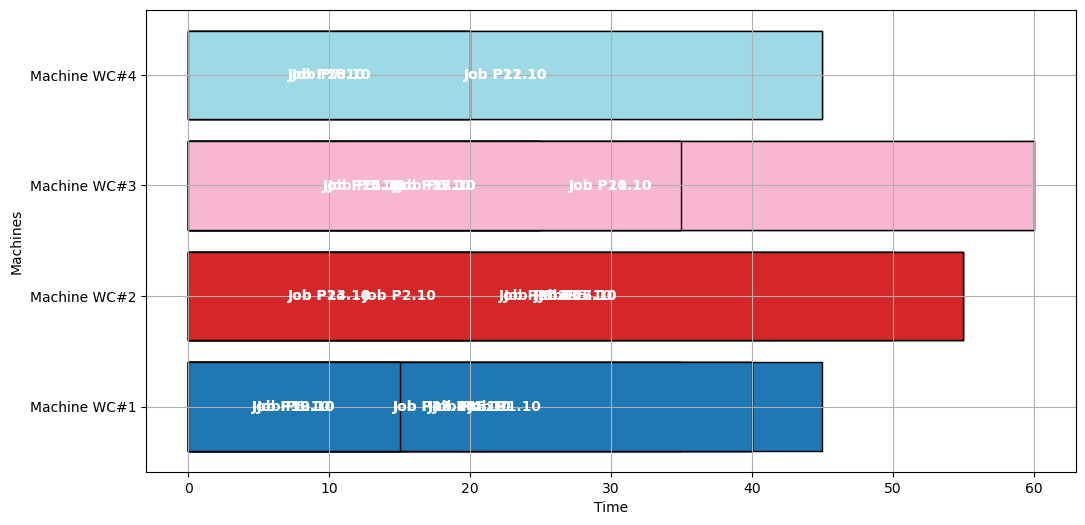

Schedules for Sheet5:
Machine WC#4:
  Job Lasagna.10 from 0 to 45
Machine WC#1:
  Job Tomato Sauce.10 from 0 to 20
  Job Bechamel Sauce.10 from 0 to 35
  Job Tomatoes.10 from 0 to 10
  Job Garlic.10 from 0 to 10
  Job Butter.10 from 0 to 15
  Job Nutmeg.10 from 0 to 10
  Job Cream.10 from 0 to 20
Machine WC#2:
  Job Cheese.10 from 0 to 30
  Job Ground Beef.10 from 0 to 15
  Job Milk.10 from 0 to 15
  Job Rennet.10 from 0 to 10
  Job Beef.10 from 0 to 20
  Job Seasoning.10 from 0 to 10
Machine WC#3:
  Job Noodles.10 from 0 to 25
  Job Olive Oil.10 from 0 to 15
  Job Flour.10 from 0 to 10
  Job Eggs.10 from 0 to 10
  Job Salt.10 from 0 to 10
  Job Olives.10 from 0 to 20


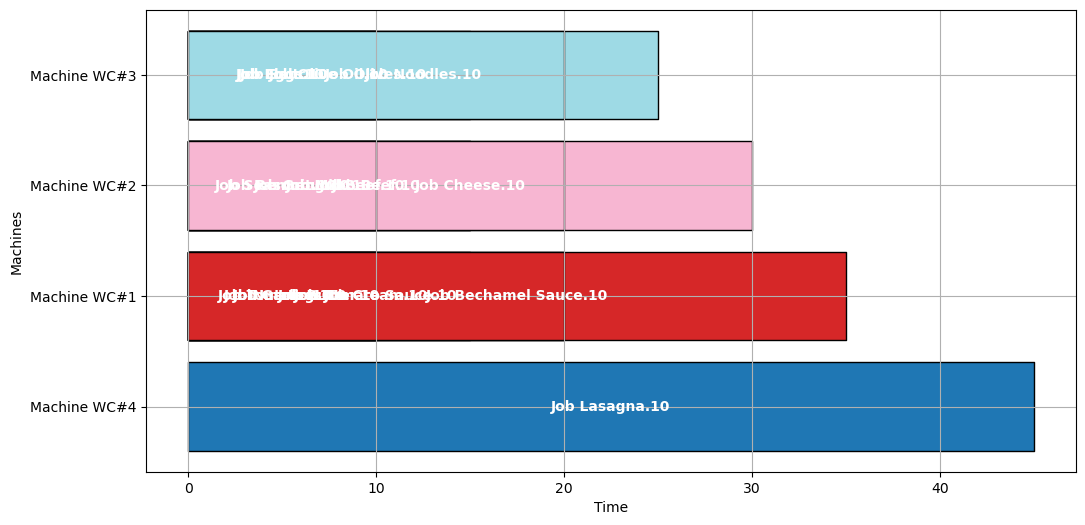

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the required columns are present in the DataFrame
required_columns = ['operation', 'processing_time', 'workcenter', 'predecessor_operations', 'due_date', 'components_required']

# Process the DataFrame to handle predecessor operations correctly
def process_df(df):
    if 'predecessor_operations' in df.columns:
        df['predecessor_operations'] = df['predecessor_operations'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
    else:
        df['predecessor_operations'] = [[] for _ in range(len(df))]
    return df

# Function to check if a job can be scheduled across workcenters
def can_be_scheduled(job_id, completed_jobs, overall_job_completion_times, df, workcenters):
    predecessors = df[df['operation'] == job_id]['predecessor_operations'].iloc[0]
    for pred in predecessors:
        if pred not in completed_jobs and not all(overall_job_completion_times.get(pred, {}).values()):
            return False
    return True

# Function to schedule jobs
def schedule_jobs(df):
    # Initialize dictionaries to store schedules and completion times
    schedules = {}
    overall_job_completion_times = {job_id: {wc: 0 for wc in df['workcenter'].unique()} for job_id in df['operation'].unique()}
    
    # Initialize set for completed jobs
    completed_jobs = set()
    
    # Extract job processing times and due dates
    processing_times = df.set_index('operation')['processing_time'].to_dict()
    due_dates = df.set_index('operation')['due_date'].to_dict()
    workcenters = df.set_index('operation')['workcenter'].to_dict()
    
    # Sort jobs by due date
    jobs_sorted_by_due_date = sorted(df['operation'].unique(), key=lambda x: due_dates.get(x, float('inf')))
    
    # Schedule jobs
    for job in jobs_sorted_by_due_date:
        if can_be_scheduled(job, completed_jobs, overall_job_completion_times, df, workcenters):
            # Determine the earliest start time across all machines
            predecessors = df[df['operation'] == job]['predecessor_operations'].iloc[0]
            if predecessors:
                start_times = []
                for pred in predecessors:
                    start_times.append(max([overall_job_completion_times[pred][wc] for wc in workcenters.values()]))
                start_time = max(start_times)
            else:
                start_time = 0  # No predecessors, can start immediately
            
            machine = workcenters[job]
            end_time = start_time + processing_times[job]
            
            if machine not in schedules:
                schedules[machine] = []
            
            schedules[machine].append((job, start_time, end_time))
            
            overall_job_completion_times[job][machine] = end_time
            completed_jobs.add(job)
    
    return schedules

# Plotting function for the Gantt chart
def plot_gantt_chart(schedules):
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = plt.cm.get_cmap('tab20', len(schedules))
    
    machine_idx = 0
    for machine, jobs in schedules.items():
        for job, start_time, end_time in jobs:
            ax.broken_barh([(start_time, end_time - start_time)], (machine_idx - 0.4, 0.8),
                           facecolors=(colors(machine_idx)), edgecolor='black')
            ax.text((start_time + end_time) / 2, machine_idx, f"Job {job}", 
                    ha='center', va='center', color='white', weight='bold')
        machine_idx += 1

    ax.set_yticks(range(len(schedules)))
    ax.set_yticklabels([f"Machine {m}" for m in schedules.keys()])
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.grid(True)
    plt.show()

# Load the Excel file and process each sheet
dict_df = {}
filepath = 'agrawal_test_set.xlsx'
excel_file = pd.ExcelFile(filepath)

for sheet_name in excel_file.sheet_names:
    dict_df[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

# Schedule the jobs for each sheet in the Excel file
for df_key in dict_df:
    df = dict_df[df_key]
    
    # Ensure all required columns are present
    for col in required_columns:
        if col not in df.columns:
            if col == 'predecessor_operations':
                df[col] = [[] for _ in range(len(df))]
            elif col == 'due_date':
                df[col] = [float('inf') for _ in range(len(df))]
            elif col == 'components_required':
                df[col] = [[] for _ in range(len(df))]
            else:
                raise KeyError(f"Column '{col}' not found in the DataFrame '{df_key}'")
    
    df = process_df(df)
    
    schedules = schedule_jobs(df)
    
    print(f"Schedules for {df_key}:")
    for machine, jobs in schedules.items():
        print(f"Machine {machine}:")
        for job, start_time, end_time in jobs:
            print(f"  Job {job} from {start_time} to {end_time}")

    plot_gantt_chart(schedules)


### Nathan

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations,due_dates
0,B,B.10,10,"[A, K]",2,WC#1,[],20.0
1,C,C.10,10,"[B,D,K]",1,WC#1,[B.10],19.0
2,E,E.10,10,"[C,L]",1,WC#2,"[C.10, L.10]",18.0
3,F,F.10,10,"[C,G]",3,WC#2,[C.10],17.0
4,H,H.10,10,"[E,F]",7,WC#3,"[E.10, F.10]",16.0
5,I,I.10,10,[H],4,WC#2,[H.10],15.0
6,J,J.10,10,"[I,M]",18,WC#1,"[I.10, M.10]",14.0
7,L,L.10,10,[J],3,WC#3,[J.10],13.0
8,M,M.10,10,"[L,N]",5,WC#2,"[L.10, N.10]",12.0
9,N,N.10,10,"[J,V]",10,WC#2,[J.10],11.0


{'B.10': <__main__.Operation object at 0x000001F0DC5A4BD0>, 'C.10': <__main__.Operation object at 0x000001F0DB821BD0>, 'E.10': <__main__.Operation object at 0x000001F0DC66D5D0>, 'F.10': <__main__.Operation object at 0x000001F0DC5D9A90>, 'H.10': <__main__.Operation object at 0x000001F0DB8230D0>, 'I.10': <__main__.Operation object at 0x000001F0DB7F2190>, 'J.10': <__main__.Operation object at 0x000001F0DC5A6A50>, 'L.10': <__main__.Operation object at 0x000001F0DB7F1110>, 'M.10': <__main__.Operation object at 0x000001F0DC5A6390>, 'N.10': <__main__.Operation object at 0x000001F0DC5A5890>, 'O.10': <__main__.Operation object at 0x000001F0DC5A72D0>, 'P.10': <__main__.Operation object at 0x000001F0DC5A52D0>, 'Q.10': <__main__.Operation object at 0x000001F0DC6C4C10>, 'R.10': <__main__.Operation object at 0x000001F0DC6C6610>, 'T.10': <__main__.Operation object at 0x000001F0DC6C63D0>, 'U.10': <__main__.Operation object at 0x000001F0DC6C7750>}
{'B.10': 20, 'C.10': 19, 'E.10': 18, 'F.10': 17, 'H.10'

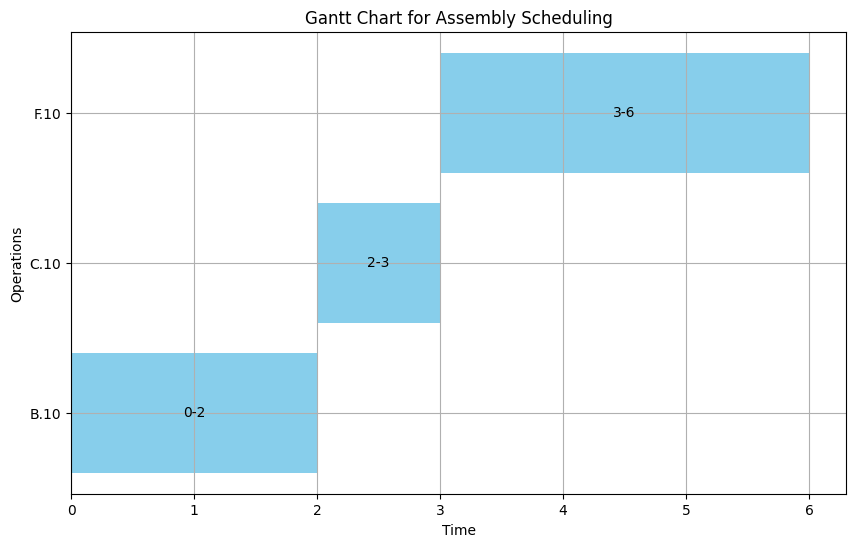

In [83]:
df = dict_df['Sheet1']
display(df)

class Operation:
    def __init__(self, id, processing_time, workcenter, predecessor_operations=None, components_required=None):
        self.id = id
        self.processing_time = processing_time
        self.workcenter = workcenter
        self.predecessor_operations = predecessor_operations if predecessor_operations else []
        self.components_required = components_required if components_required else []
        self.start_time = None
        self.end_time = None
        self.scheduled = False

def load_operations_from_df(df):
    """
    Loads operations from a DataFrame and creates Operation objects.    
    Inputs:
        - df: pandas DataFrame - A DataFrame containing BOM information with columns 
          ['part', 'operation', 'operation_id', 'components_required', 'processing_time', 'workcenter', 'predecessor_operations'].
    Output:
        - operations: dictionary, {operation_id: Operation()} - A dictionary of Operation objects.
    """
    operations = {}
    for idx, row in df.iterrows():
        operation_id = row['operation']
        successors = row['predecessor_operations']
        components_required = row['components_required']  # Assuming 'components_required' is a list in the DataFrame
        operations[operation_id] = Operation(operation_id, row['processing_time'], row['workcenter'], successors, components_required)
    return operations

def load_due_dates(df):
    """
    Generates due dates for each operation.    
    Inputs:
        - df: pandas DataFrame - A DataFrame containing BOM information.
    Output:
        - due_dates: dictionary, {operation_id: int} - A dictionary of due dates for each operation.
    """
    due_dates = {}
    for idx, row in df.iterrows():
        operation_id = row['operation']
        # Example due date assignment, this should be adjusted as per actual due dates
        due_dates[operation_id] = 20 - idx  # Example: descending due dates
    return due_dates

operations = load_operations_from_df(df)
print(operations)
due_dates = load_due_dates(df)
print(due_dates)

for i in range(len(df)):
    operation = df.at[i, 'operation']
    df.at[i,'due_dates'] = due_dates[operation]

def schedule_operations(operations, due_dates):
    # Initialize starting dictionary of available operations (operations without any predecessors)
    available_operations = {}
    completed_operations = {}
    
    for operation_id, operation in operations.items():
        if not operation.predecessor_operations:
            available_operations[operation_id] = operation

    current_makespan = 0
    
    while len(available_operations) > 0:
        # Sort available operations by their due dates
        sorted_operations = sorted(available_operations.values(), key=lambda op: due_dates[op.id])
        selected_operation = sorted_operations[0]
        
        # Schedule the selected operation
        selected_operation.start_time = current_makespan
        selected_operation.end_time = selected_operation.start_time + selected_operation.processing_time
        selected_operation.scheduled = True

        # Remove selected operation from available and add to completed
        available_operations.pop(selected_operation.id)
        completed_operations[selected_operation.id] = selected_operation

        # Update the makespan
        current_makespan = max(current_makespan, selected_operation.end_time)

        # Update the list of available operations
        for operation_id, operation in operations.items():
            if not operation.scheduled and operation_id not in available_operations and operation_id not in completed_operations:
                if all(pred in completed_operations for pred in operation.predecessor_operations):
                    available_operations[operation_id] = operation

        print("Available Operations:", list(available_operations.keys()))

    print("Completed Operations:")
    for op_id, op in completed_operations.items():
        print(f"Operation ID: {op.id}, Start Time: {op.start_time}, End Time: {op.end_time}")

    return list(completed_operations.values())


scheduled_operations = schedule_operations(operations, due_dates)

def plot_gantt_chart(scheduled_operations):
    """
    Plots a Gantt chart for the scheduled operations.
    
    Inputs:
    - scheduled_operations (list Operation()): A list of scheduled Operation objects.
    
    Output:
    - Displays a Gantt chart.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    for op in scheduled_operations:
        ax.barh(op.id, op.processing_time, left=op.start_time, color='skyblue')
        ax.text(op.start_time + op.processing_time / 2, op.id, f'{op.start_time}-{op.end_time}', ha='center', va='center', color='black')

    ax.set_xlabel('Time')
    ax.set_ylabel('Operations')
    ax.set_title('Gantt Chart for Assembly Scheduling')
    plt.grid(True)
    plt.show()

plot_gantt_chart(scheduled_operations)


In [71]:
x = ["hello", "world"]
x.remove("hello")
print(x)

['world']


In [59]:
for operation_id, operation in operations.items(): 
    print(operation_id, operation)

B.10 <__main__.Operation object at 0x000001F0DAE0DF10>
C.10 <__main__.Operation object at 0x000001F0DAE45190>
E.10 <__main__.Operation object at 0x000001F0DADE7610>
F.10 <__main__.Operation object at 0x000001F0DB7F2A50>
H.10 <__main__.Operation object at 0x000001F0DAEF4310>
I.10 <__main__.Operation object at 0x000001F0DADE7E90>
J.10 <__main__.Operation object at 0x000001F0D953F890>
L.10 <__main__.Operation object at 0x000001F0DAF1BF50>
M.10 <__main__.Operation object at 0x000001F0DAF1A6D0>
N.10 <__main__.Operation object at 0x000001F0DAF18690>
O.10 <__main__.Operation object at 0x000001F0DAEA91D0>
P.10 <__main__.Operation object at 0x000001F0DB6A11D0>
Q.10 <__main__.Operation object at 0x000001F0DAE98ED0>
R.10 <__main__.Operation object at 0x000001F0DAEA8510>
T.10 <__main__.Operation object at 0x000001F0DAE99550>
U.10 <__main__.Operation object at 0x000001F0DAEA9910>


In [50]:
available_operations = df[df['predecessor_operations'].apply(len) == 0]['operation'].tolist()
print(available_operations)

['B.10']
